In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'sicilia'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,19,Sicilia,1,0,1,2,3,3,3,...,0.0,0.0,0.0,2.0,0.00,33.33,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,19,Sicilia,1,0,1,2,3,0,0,...,0.0,0.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,19,Sicilia,1,0,1,1,2,-1,1,...,0.0,0.0,0.0,-1.0,0.00,50.00,0.00,0.00,0.00,-33.33
3,2020-02-28T18:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,0.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,1.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2021-08-19T17:00:00,19,Sicilia,641,83,724,19978,20702,985,1377,...,16.0,16265.0,8048.0,962.0,11.46,3.50,8.47,17.11,3.75,5.00
542,2021-08-20T17:00:00,19,Sicilia,663,83,746,20519,21265,563,1508,...,12.0,17543.0,7399.0,541.0,11.13,3.51,8.60,20.38,0.00,2.72
543,2021-08-21T17:00:00,19,Sicilia,677,84,761,21868,22629,1364,1739,...,12.0,20812.0,7925.0,1349.0,11.04,3.36,8.36,21.94,1.20,6.41
544,2021-08-22T17:00:00,19,Sicilia,704,84,788,22672,23460,831,1350,...,6.0,11215.0,6487.0,804.0,10.66,3.36,12.04,20.81,0.00,3.67


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 8, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1121
Nuovi tamponi: 12565.0
Percentuale nuovi positivi/nuovi tamponi: 8.9 %
Nuovi guariti: 415.0
Nuovi deceduti: 20.0
Variazione positivi ricoverati con sintomi: 25.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 657.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 8, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-06-24T17:00:00,19,Sicilia,185,27,212,4541,4753,-155,119,...,6.0,16962.0,5049.0,-136.0,12.74,4.46,0.70,2.36,8.00,-3.16
1,2021-06-25T17:00:00,19,Sicilia,175,23,198,4233,4431,-322,67,...,6.0,11632.0,2619.0,-308.0,11.62,4.47,0.58,2.56,-14.81,-6.77
2,2021-06-26T17:00:00,19,Sicilia,166,20,186,4186,4372,-59,111,...,1.0,13311.0,4072.0,-47.0,10.75,4.25,0.83,2.73,-13.04,-1.33
3,2021-06-27T17:00:00,19,Sicilia,162,23,185,4183,4368,-4,111,...,1.0,4520.0,2303.0,-3.0,12.43,4.24,2.46,4.82,15.00,-0.09
4,2021-06-28T17:00:00,19,Sicilia,171,24,195,4157,4352,-16,84,...,0.0,12892.0,3212.0,-26.0,12.31,4.48,0.65,2.62,4.35,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-08-19T17:00:00,19,Sicilia,641,83,724,19978,20702,985,1377,...,16.0,16265.0,8048.0,962.0,11.46,3.50,8.47,17.11,3.75,5.00
57,2021-08-20T17:00:00,19,Sicilia,663,83,746,20519,21265,563,1508,...,12.0,17543.0,7399.0,541.0,11.13,3.51,8.60,20.38,0.00,2.72
58,2021-08-21T17:00:00,19,Sicilia,677,84,761,21868,22629,1364,1739,...,12.0,20812.0,7925.0,1349.0,11.04,3.36,8.36,21.94,1.20,6.41
59,2021-08-22T17:00:00,19,Sicilia,704,84,788,22672,23460,831,1350,...,6.0,11215.0,6487.0,804.0,10.66,3.36,12.04,20.81,0.00,3.67


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

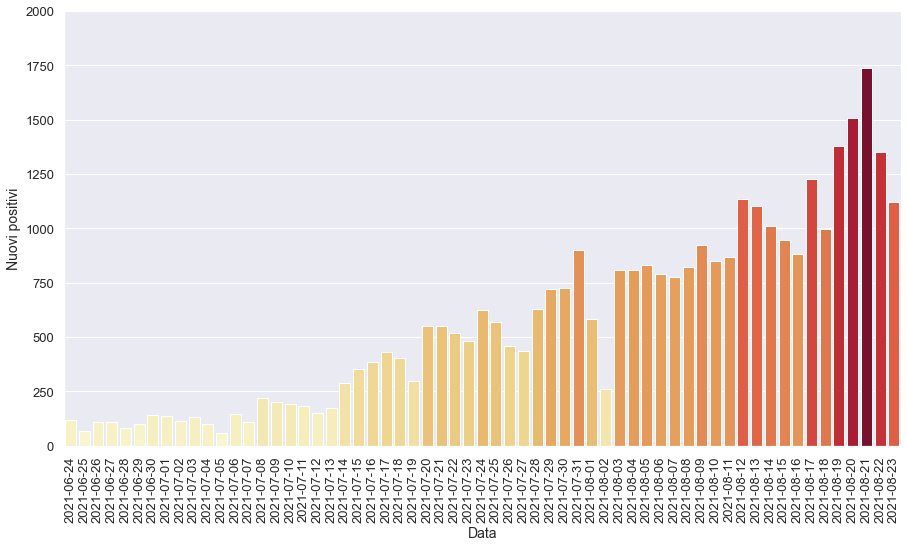

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

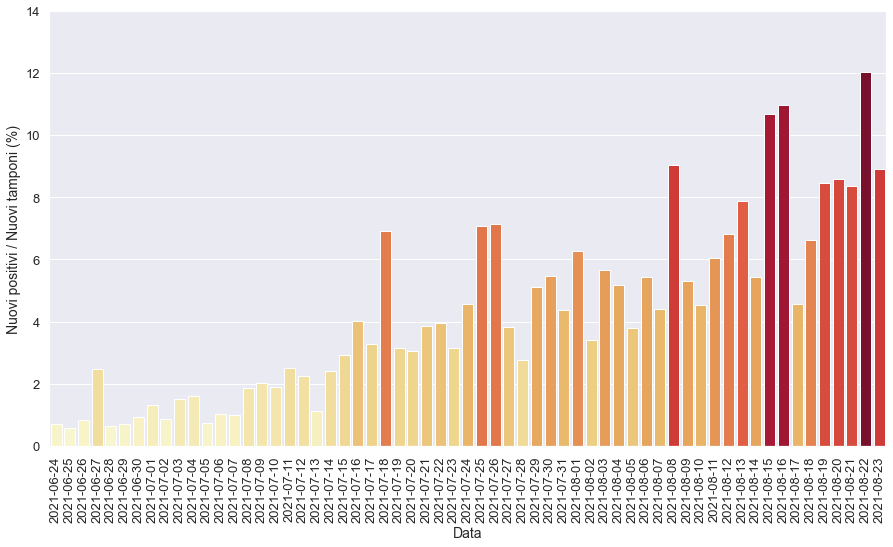

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

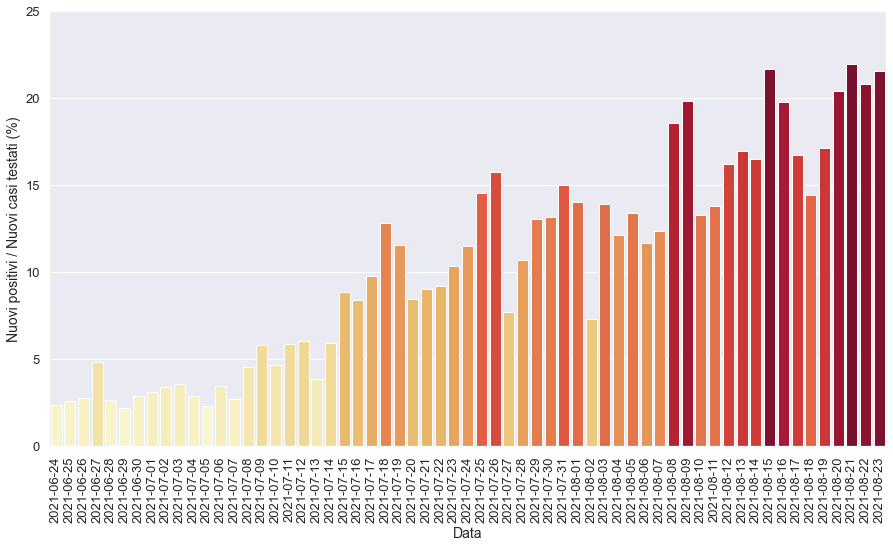

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

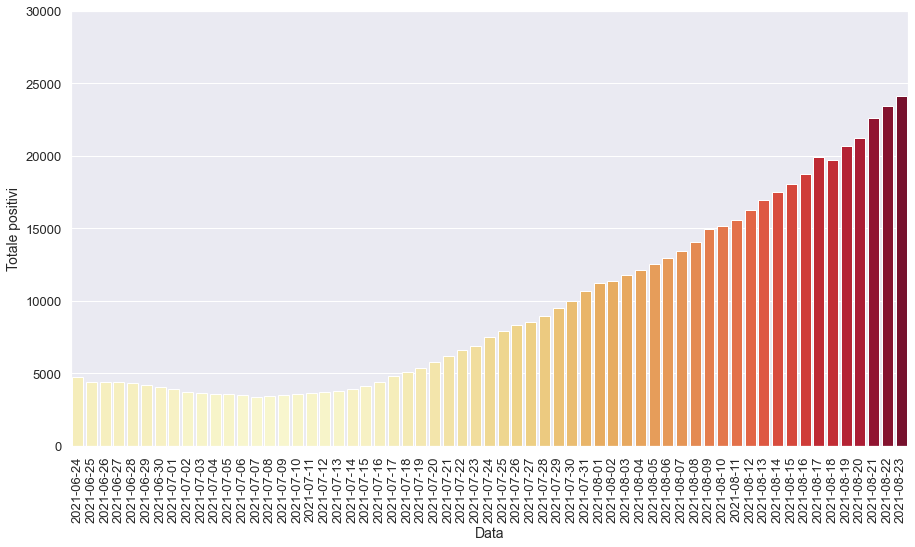

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

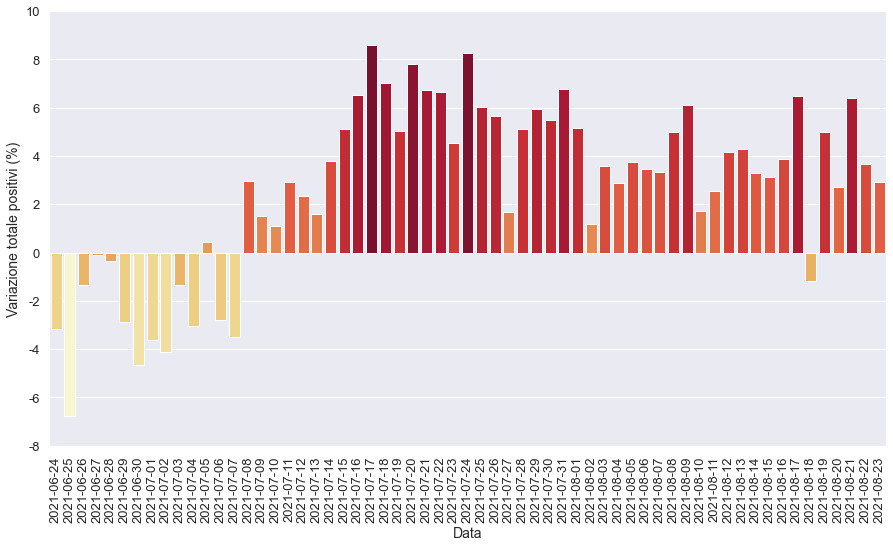

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

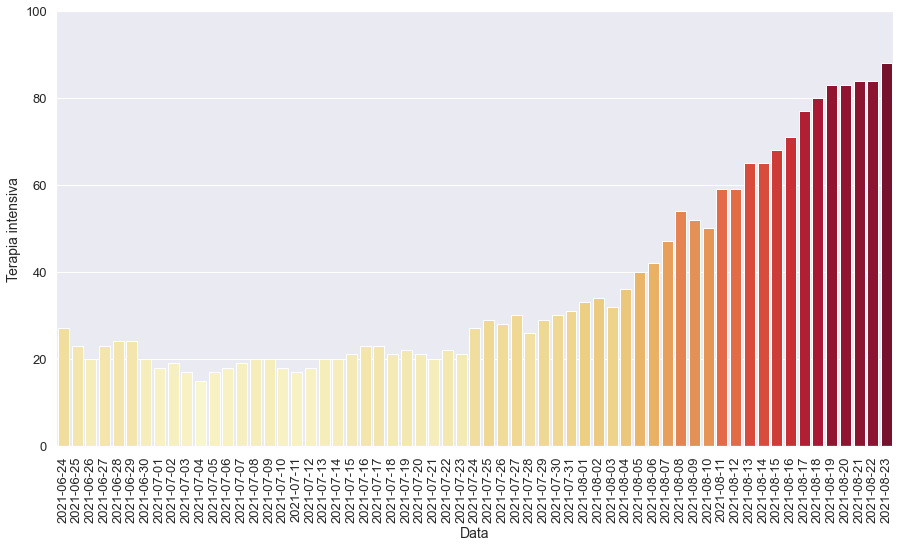

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

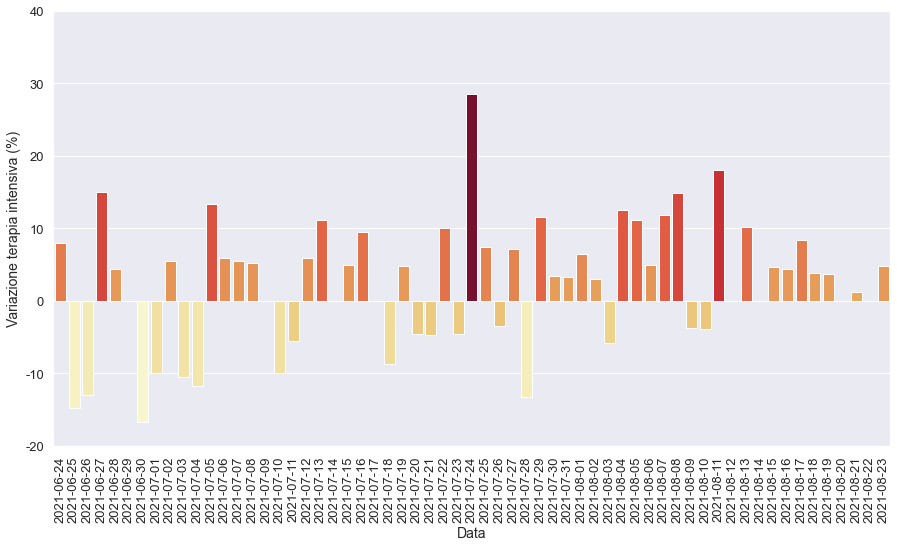

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

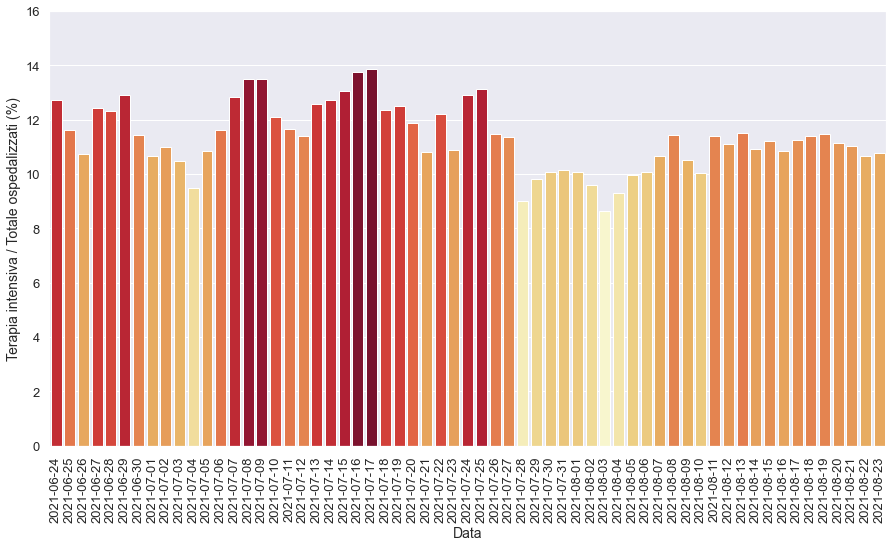

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

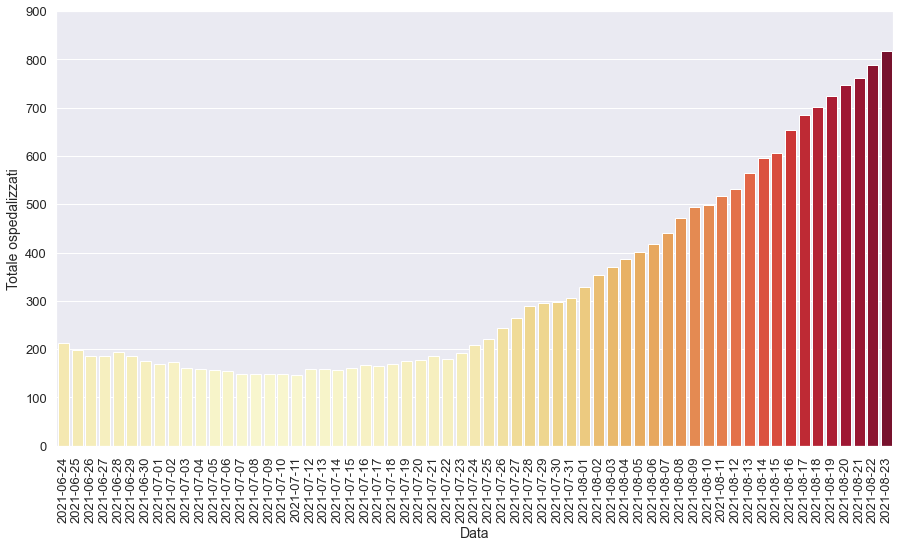

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

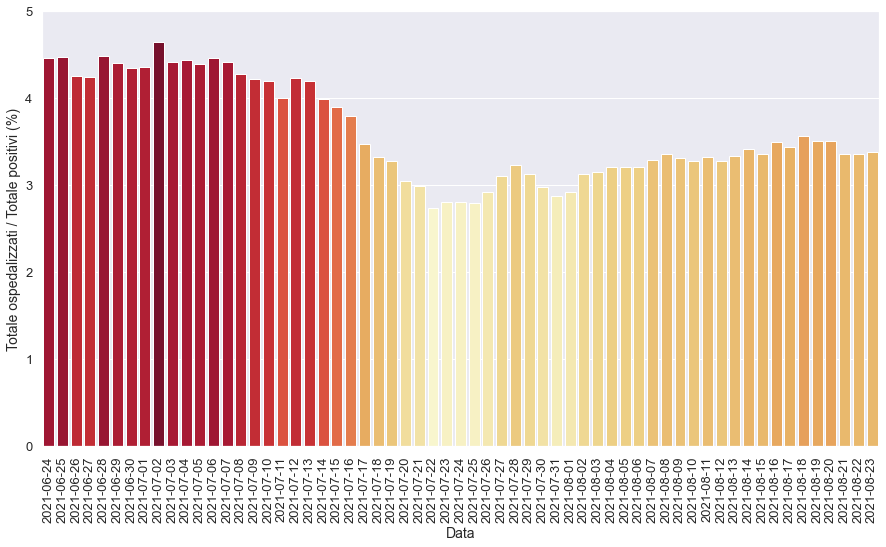

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

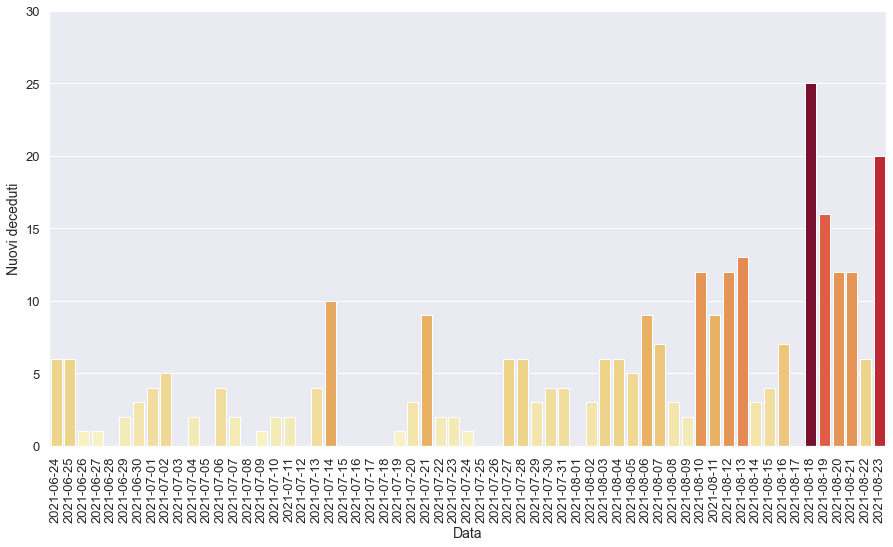

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

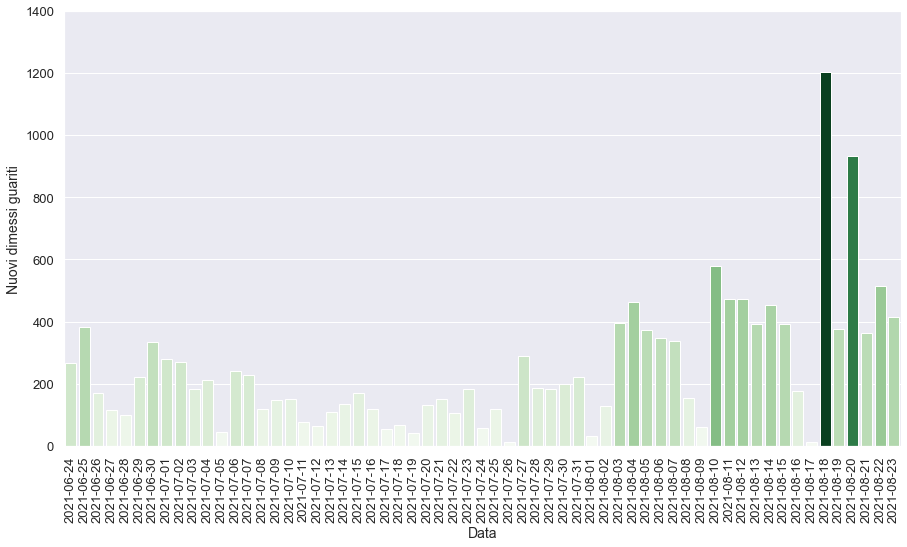

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-07-24T17:00:00,19,Sicilia,182,27,209,7263,7472,569,626,...,1.0,13735.0,5463.0,553.0,12.92,2.80,4.56,11.46,28.57,8.24
1,2021-07-25T17:00:00,19,Sicilia,192,29,221,7700,7921,449,568,...,0.0,8025.0,3907.0,437.0,13.12,2.79,7.08,14.54,7.41,6.01
2,2021-07-26T17:00:00,19,Sicilia,216,28,244,8123,8367,446,457,...,0.0,6395.0,2906.0,423.0,11.48,2.92,7.15,15.73,-3.45,5.63
3,2021-07-27T17:00:00,19,Sicilia,234,30,264,8244,8508,141,436,...,6.0,11375.0,5654.0,121.0,11.36,3.10,3.83,7.71,7.14,1.69
4,2021-07-28T17:00:00,19,Sicilia,263,26,289,8654,8943,435,627,...,6.0,22766.0,5871.0,410.0,9.00,3.23,2.75,10.68,-13.33,5.11
5,2021-07-29T17:00:00,19,Sicilia,267,29,296,9179,9475,532,719,...,3.0,14046.0,5512.0,525.0,9.80,3.12,5.12,13.04,11.54,5.95
6,2021-07-30T17:00:00,19,Sicilia,268,30,298,9697,9995,520,724,...,4.0,13233.0,5516.0,518.0,10.07,2.98,5.47,13.13,3.45,5.49
7,2021-07-31T17:00:00,19,Sicilia,275,31,306,10364,10670,675,901,...,4.0,20610.0,6011.0,667.0,10.13,2.87,4.37,14.99,3.33,6.75
8,2021-08-01T17:00:00,19,Sicilia,295,33,328,10891,11219,549,581,...,0.0,9282.0,4140.0,527.0,10.06,2.92,6.26,14.03,6.45,5.15
9,2021-08-02T17:00:00,19,Sicilia,320,34,354,10995,11349,130,262,...,3.0,7718.0,3589.0,104.0,9.60,3.12,3.39,7.30,3.03,1.16


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

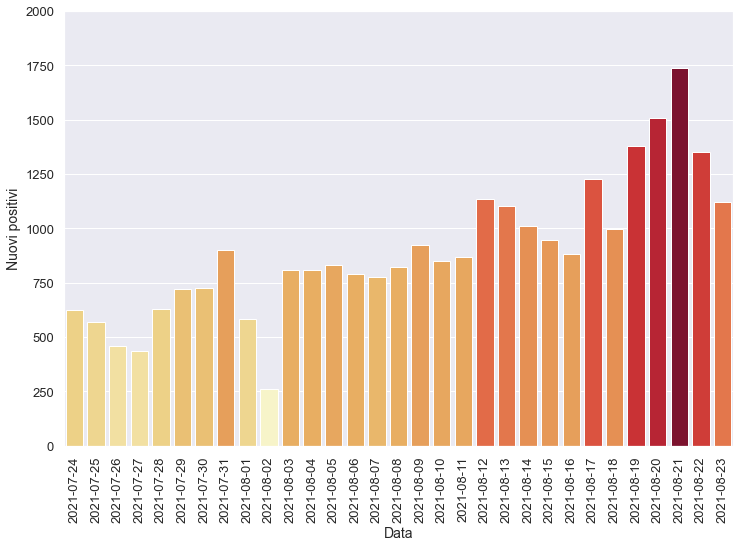

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

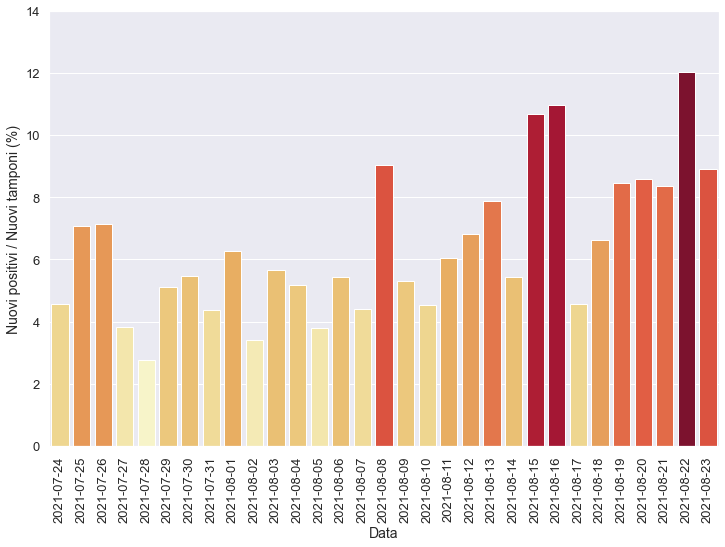

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

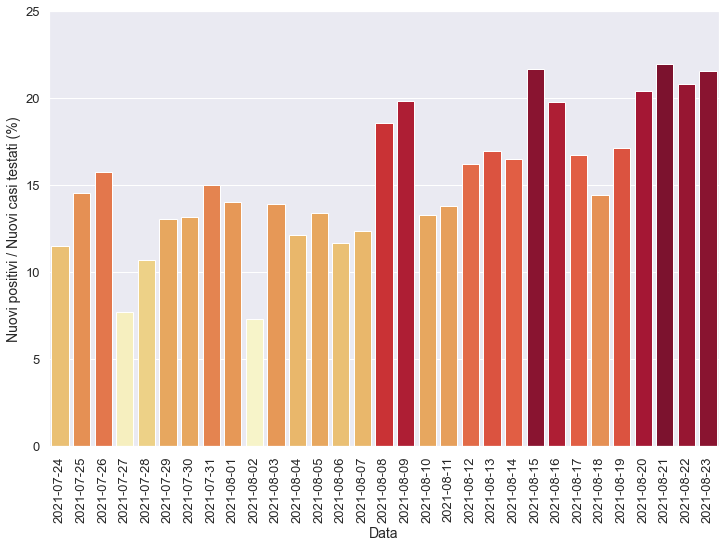

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

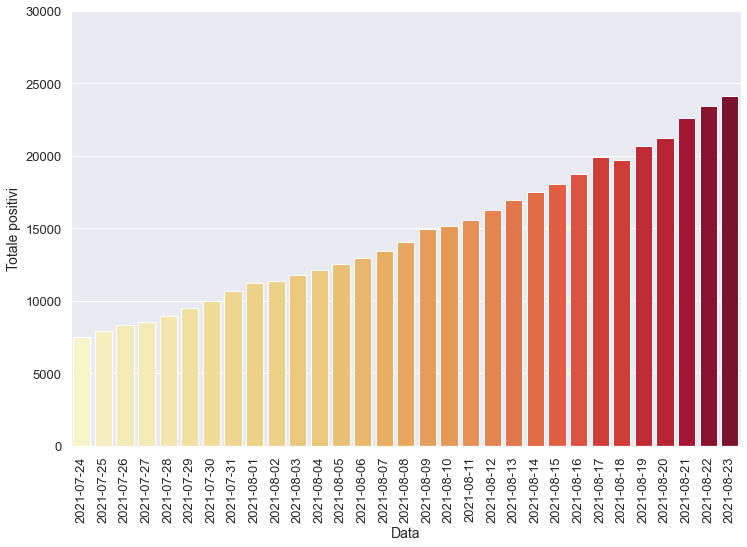

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

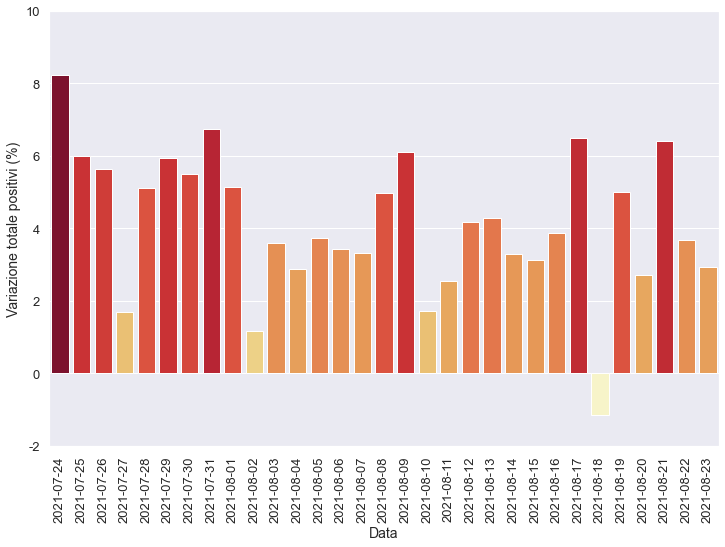

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

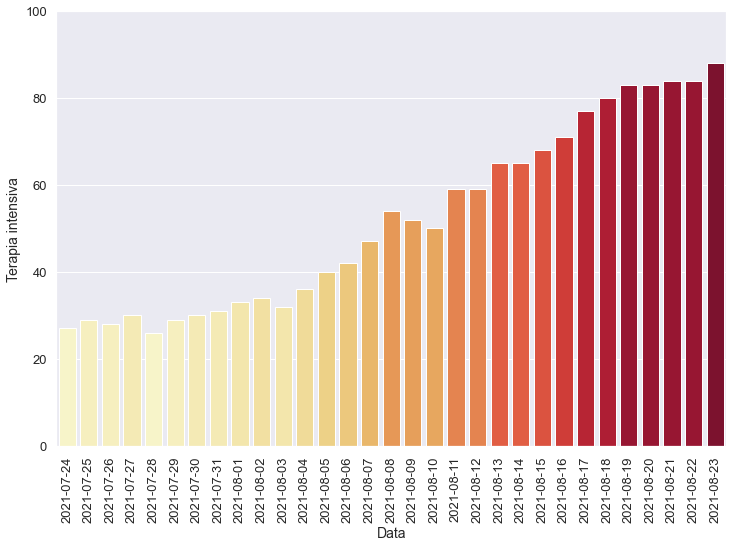

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

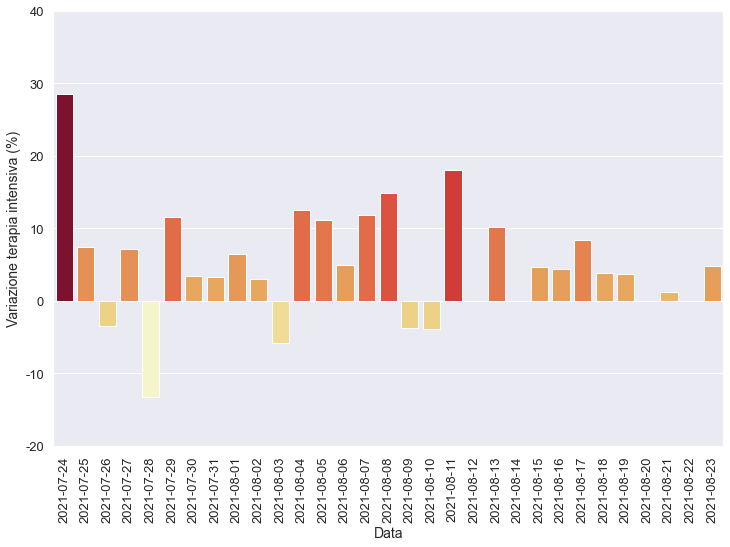

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

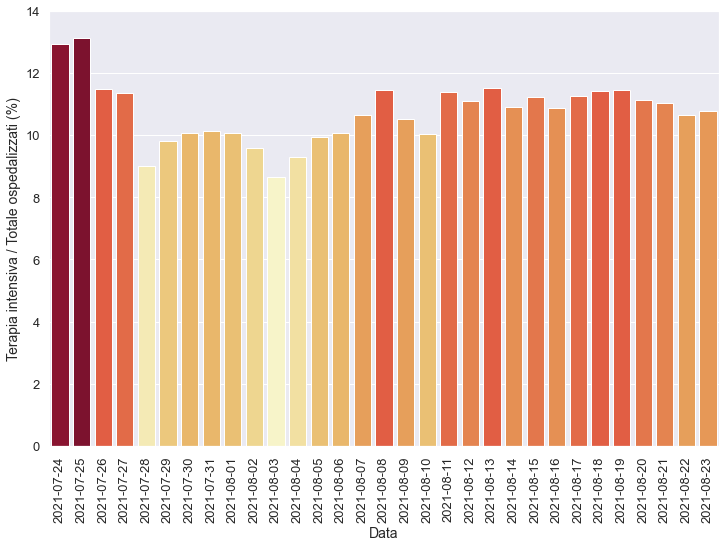

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

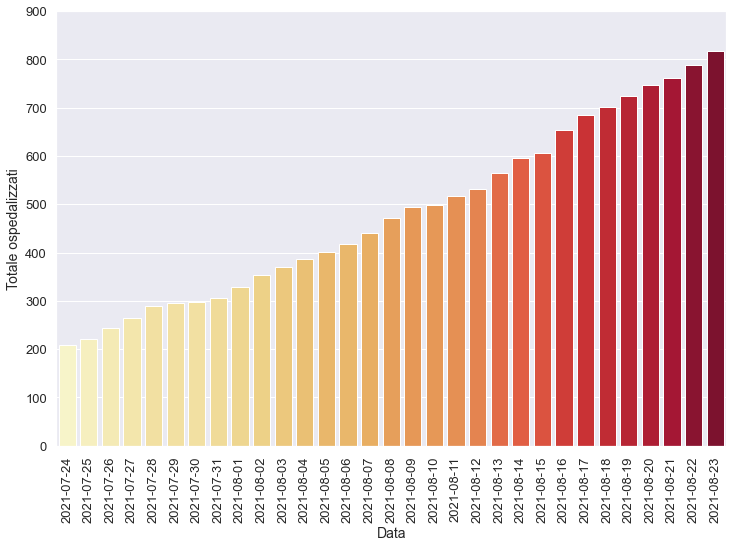

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

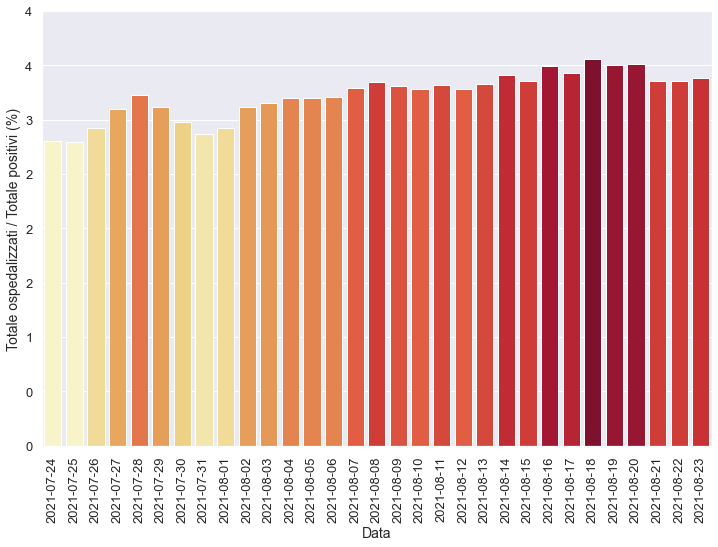

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

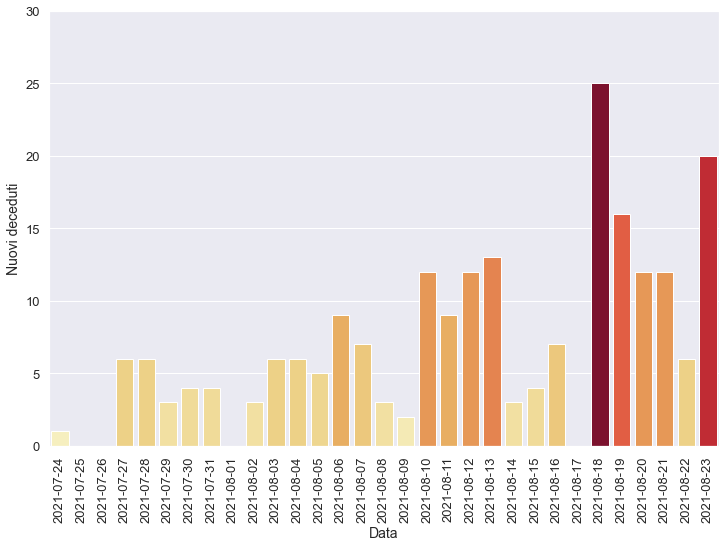

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

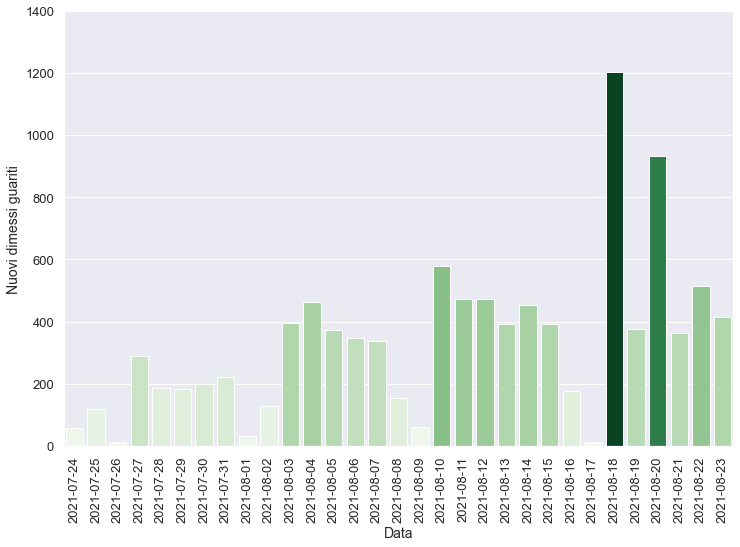

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-08-16T17:00:00,19,Sicilia,583,71,654,18079,18733,697,881,...,7.0,8028.0,4455.0,649.0,10.86,3.49,10.97,19.78,4.41,3.86
1,2021-08-17T17:00:00,19,Sicilia,607,77,684,19265,19949,1216,1229,...,0.0,26865.0,7362.0,1186.0,11.26,3.43,4.57,16.69,8.45,6.49
2,2021-08-18T17:00:00,19,Sicilia,621,80,701,19016,19717,-232,997,...,25.0,15038.0,6911.0,-249.0,11.41,3.56,6.63,14.43,3.90,-1.16
3,2021-08-19T17:00:00,19,Sicilia,641,83,724,19978,20702,985,1377,...,16.0,16265.0,8048.0,962.0,11.46,3.50,8.47,17.11,3.75,5.00
4,2021-08-20T17:00:00,19,Sicilia,663,83,746,20519,21265,563,1508,...,12.0,17543.0,7399.0,541.0,11.13,3.51,8.60,20.38,0.00,2.72
5,2021-08-21T17:00:00,19,Sicilia,677,84,761,21868,22629,1364,1739,...,12.0,20812.0,7925.0,1349.0,11.04,3.36,8.36,21.94,1.20,6.41
6,2021-08-22T17:00:00,19,Sicilia,704,84,788,22672,23460,831,1350,...,6.0,11215.0,6487.0,804.0,10.66,3.36,12.04,20.81,0.00,3.67
7,2021-08-23T17:00:00,19,Sicilia,729,88,817,23329,24146,686,1121,...,20.0,12565.0,5209.0,657.0,10.77,3.38,8.92,21.52,4.76,2.92


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

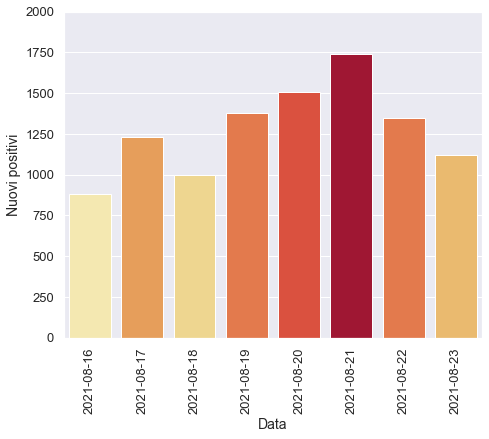

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

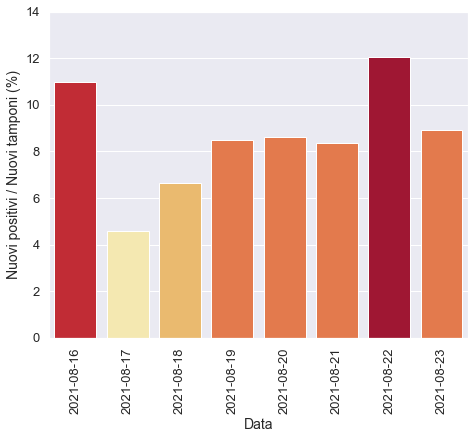

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

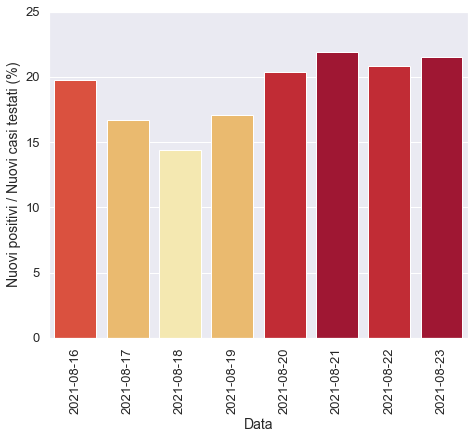

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

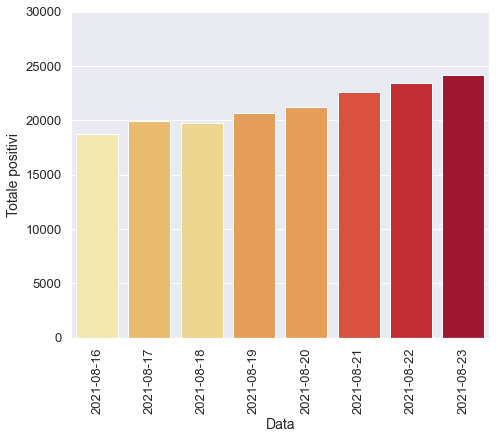

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

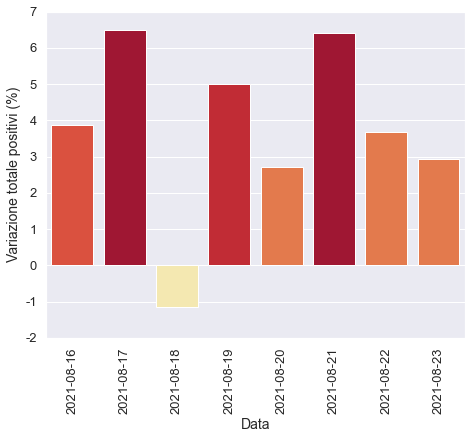

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

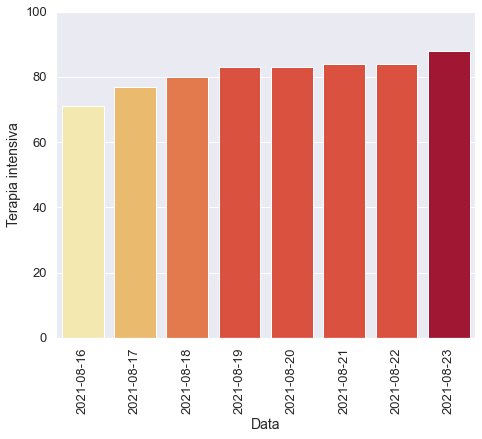

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

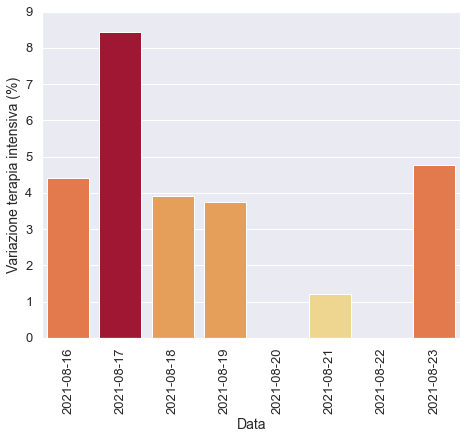

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

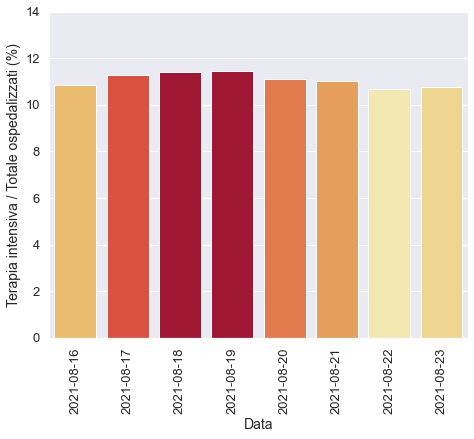

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

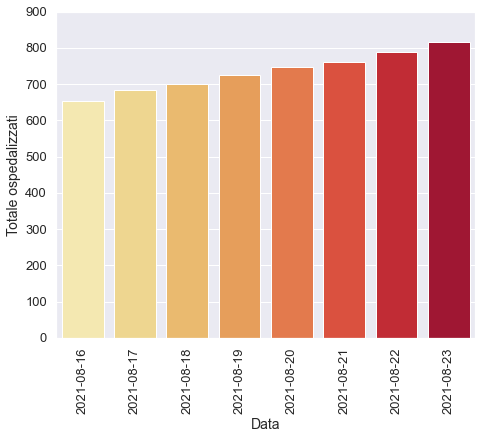

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

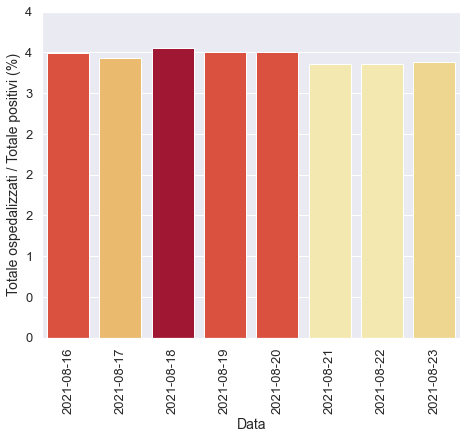

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

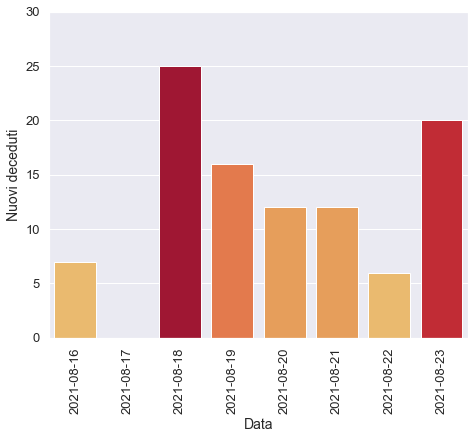

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

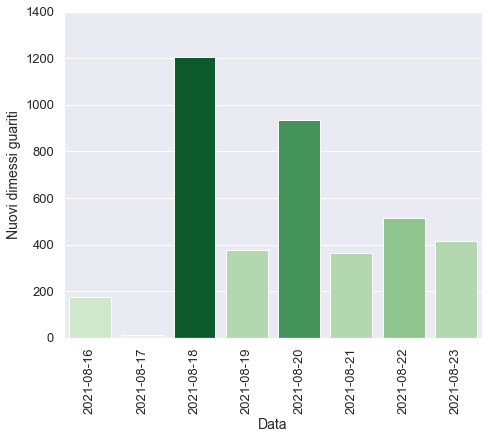

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)